In [139]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [140]:
#loading datasets
train=pd.read_csv("train.csv", nrows= 6000000)
train.shape

(6000000, 2)

In [141]:
train.info()
#train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 2 columns):
acoustic_data      int64
time_to_failure    float64
dtypes: float64(1), int64(1)
memory usage: 91.6 MB


In [142]:
train.head()

,acoustic_data,time_to_failure
0,12,1.4690999832000000
1,6,1.4690999821000001
2,8,1.4690999809999998
3,5,1.4690999799000002
4,8,1.4690999787999999


In [143]:
type(train)

pandas.core.frame.DataFrame

In [144]:
train.describe()

,acoustic_data,time_to_failure
count,6.0000000000000000e+06,6.0000000000000000e+06
mean,4.5456596666666664e+00,1.3509578973156906e+00
std,2.2773028263417910e+01,2.5336101577087953e+00
min,-4.6210000000000000e+03,7.9547982295000012e-04
25%,2.0000000000000000e+00,3.9029643104500000e-01
50%,5.0000000000000000e+00,7.7969738116999987e-01
75%,7.0000000000000000e+00,1.1690983312750001e+00
max,3.2520000000000000e+03,1.1540799987000000e+01


In [145]:
#counting NaN, no found nan values
countNaN=train.isna().sum()
countNaN

acoustic_data      0
time_to_failure    0
dtype: int64

In [146]:
#precision for measurements increased
pd.options.display.precision = 16
train.head(5)

,acoustic_data,time_to_failure
0,12,1.4690999832000000
1,6,1.4690999821000001
2,8,1.4690999809999998
3,5,1.4690999799000002
4,8,1.4690999787999999


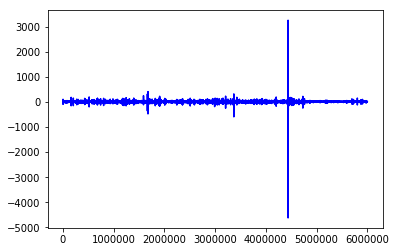

In [147]:
# graphics

#plt.plot(train['time_to_failure'], 'g')
plt.plot( train['acoustic_data'], 'b')
plt.show()


In [148]:
train_2=train[0:10000]
train_2.shape

(10000, 2)

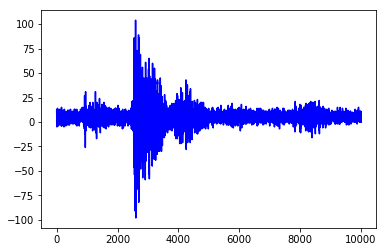

In [149]:
plt.plot(train_2['time_to_failure'], 'g', train_2['acoustic_data'], 'b')


In [150]:
#visualize data for first window https://www.kaggle.com/thomaskhu/import-and-eda
train_A = pd.read_csv('train.csv' , dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32}, nrows=6000000)
train_A.shape

(6000000, 2)

In [151]:
pd.options.display.precision = 16
train_A.head(5)

,acoustic_data,time_to_failure
0,12,1.4690999984741211
1,6,1.4690999984741211
2,8,1.4690999984741211
3,5,1.4690999984741211
4,8,1.4690999984741211


In [155]:
#defining windows. We can use a step, just checking time_to_failure i-1> time_to_failure i < time_to_failure i+1
#defining minimum value
minvalue=train_A.iloc[0,1]
lastvalue=train_A.iloc[0,1]
nextvalue=train_A.iloc[1,1]
length= len(train_A['time_to_failure'])-1

for index, value in enumerate(train_A['time_to_failure']):
    
    if index !=0 and index!=length  :
        #print(index)
        lastval=index-1
        nextval=index+1
        lastvalue=train_A.iloc[lastval,1]
        nextvalue=train_A.iloc[nextval,1]
        if (value<lastvalue and value<nextvalue):
            print ("Este es el valor", index)

# this code takes too long... Try a numpy array with 3 columns and compare.

KeyboardInterrupt: 

In [154]:
# create a numpy narray with 3 columns and compare values


In [156]:
# train.iloc[1,0] for acoustic data train.iloc[1,1] for time to failure
train_A.iloc[5656573,0]

4

In [157]:
train_A.nsmallest(1,['time_to_failure'])

,acoustic_data,time_to_failure
5656573,4,0.0007954798056744


In [158]:
train_A['acoustic_data'].max()

3252

In [159]:
# index for acoustic_data max value 
train_A[['acoustic_data']].idxmax()

acoustic_data    4438687
dtype: int64

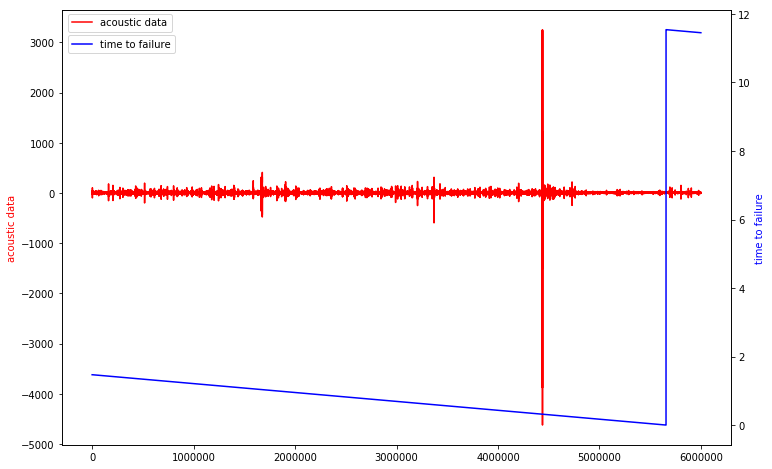

In [160]:
# parameter A defines where graph starts
A=0
#4375000
#parameter B defines where graph ends
B=6000000

train_ad_sample_df = train_A.loc[A:B,['acoustic_data']]   
train_ttf_sample_df = train_A.loc[A:B,['time_to_failure']]


#function for plotting based on both features
def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title=""):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='r')
    ax1.set_ylabel('acoustic data', color='r')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='b')
    ax2.set_ylabel('time to failure', color='b')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(False)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)

del train_ad_sample_df
del train_ttf_sample_df

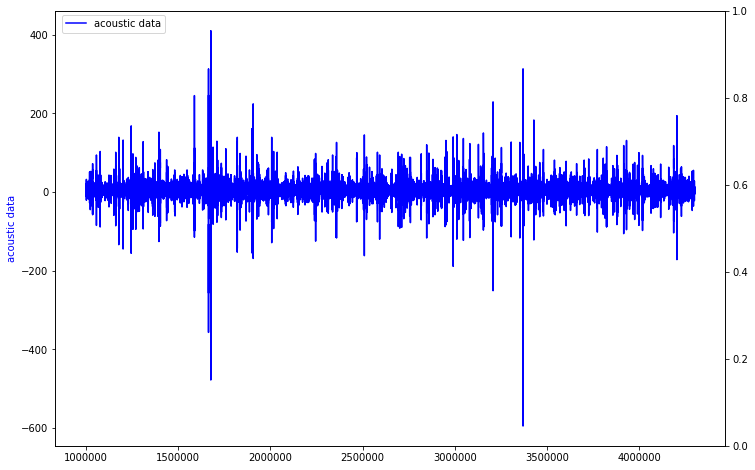

In [161]:
# defining blue region 

# parameter A defines where graph starts
A=1000000
#parameter B defines where graph ends
B=4300000

train_ad_sample_df = train_A.loc[A:B,['acoustic_data']]   

#function for plotting based on both features
def plot_acc_ttf_data(train_ad_sample_df, title=""):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='b')
    ax1.set_ylabel('acoustic data', color='b')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.grid(False)

plot_acc_ttf_data(train_ad_sample_df)

del train_ad_sample_df



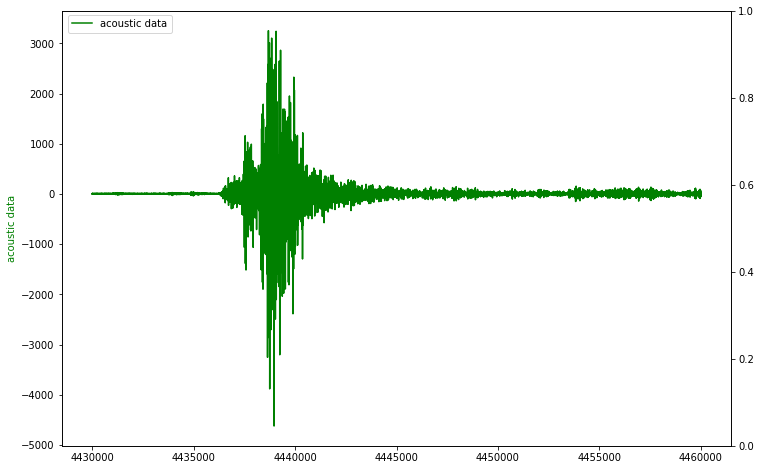

In [162]:
#defining green region 

# parameter A defines where graph starts
A=4430000
#parameter B defines where graph ends
B=4460000

train_ad_sample_df = train_A.loc[A:B,['acoustic_data']]   

#function for plotting based on both features
def plot_acc_ttf_data(train_ad_sample_df, title=""):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='g')
    ax1.set_ylabel('acoustic data', color='g')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.grid(False)

plot_acc_ttf_data(train_ad_sample_df)

del train_ad_sample_df


In [180]:
#blue window

#blue=train_A.loc[1000000:4300000,['acoustic_data']]
#memory error
blue=train_A.loc[4270000:4300000,['acoustic_data']]
blue.head()

,acoustic_data
4270000,3
4270001,1
4270002,0
4270003,-2
4270004,-1


In [174]:
blue.describe()

,acoustic_data
count,3.3000010000000000e+06
mean,4.5457898346091410e+00
std,7.7134452293098326e+00
min,-5.9500000000000000e+02
25%,2.0000000000000000e+00
50%,5.0000000000000000e+00
75%,7.0000000000000000e+00
max,4.1000000000000000e+02


In [175]:
green=train_A.loc[4430000:4460000,['acoustic_data']]
green.head()

,acoustic_data
4430000,5
4430001,5
4430002,10
4430003,3
4430004,5


In [176]:
green.describe()

,acoustic_data
count,30001.0000000000000000
mean,4.3426552448251723
std,306.7532138111505446
min,-4621.0000000000000000
25%,-18.0000000000000000
50%,4.0000000000000000
75%,26.0000000000000000
max,3252.0000000000000000


In [178]:
#ADF Test

#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(green['acoustic_data'])

Results of Dickey-Fuller Test:
Test Statistic                   -36.6586947643095655
p-value                            0.0000000000000000
#Lags Used                        50.0000000000000000
Number of Observations Used    29950.0000000000000000
Critical Value (1%)               -3.4305683592840066
Critical Value (5%)               -2.8616365088952787
Critical Value (10%)              -2.5668213687408898
dtype: float64


In [181]:
adf_test(blue['acoustic_data'])

Results of Dickey-Fuller Test:
Test Statistic                   -30.5783613944342711
p-value                            0.0000000000000000
#Lags Used                        50.0000000000000000
Number of Observations Used    29950.0000000000000000
Critical Value (1%)               -3.4305683592840066
Critical Value (5%)               -2.8616365088952787
Critical Value (10%)              -2.5668213687408898
dtype: float64


In [ ]:
# If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary)
#it does have sense p value=0?

In [185]:
#KPSS : The process is trend stationary.

#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
        
    print (kpss_output)




In [187]:
kpss_test(blue['acoustic_data'])

Results of KPSS Test:


C:\Users\John\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic            2.0157525797165863
p-value                   0.0100000000000000
Lags Used                50.0000000000000000
Critical Value (10%)      0.3470000000000000
Critical Value (5%)       0.4630000000000000
Critical Value (2.5%)     0.5740000000000000
Critical Value (1%)       0.7390000000000000
dtype: float64


In [188]:
kpss_test(green['acoustic_data'])

Results of KPSS Test:


C:\Users\John\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Test Statistic            0.0019089075550338
p-value                   0.1000000000000000
Lags Used                50.0000000000000000
Critical Value (10%)      0.3470000000000000
Critical Value (5%)       0.4630000000000000
Critical Value (2.5%)     0.5740000000000000
Critical Value (1%)       0.7390000000000000
dtype: float64
